<IPython.core.display.Javascript object>


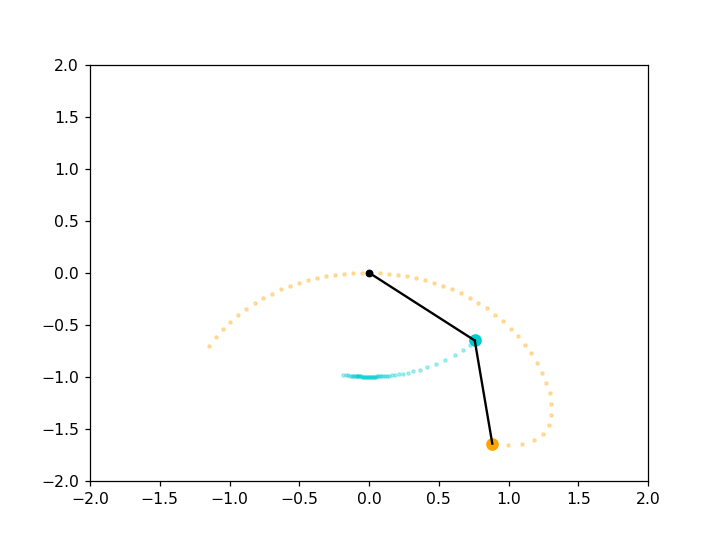

In [32]:
%matplotlib notebook
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#constants in kg and m
g = 9.8
m1 = 10
m2 = 10
L1 = 1
L2 = 1
L = L1 + L2

#initial conditions: [theta1, omega1, theta2, omega2]
y0 = np.radians([-100, 0, 30, 0]) 

#start and stop times in seconds
t = [0,10]

def f(t, y):
    
    theta1 = y[0]
    omega1 = y[1]
    theta2 = y[2]
    omega2 = y[3]

    dtdt1 = omega1   
    dwdt1 = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    dtdt2 = omega2   
    dwdt2 = (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))    
    return [dtdt1,dwdt1,dtdt2,dwdt2]

sol = integrate.solve_ivp(f, t, y0, t_eval = np.linspace(t[0],t[1],t[1] * 50))

y0 = sol.y[0]
y1 = sol.y[1]
y2 = sol.y[2]
y3 = sol.y[3]

# find the x and y coordinates of m1 and m2
x1 = L1 * np.sin(y0);
y1 = - L1 * np.cos(y0);

x2 = x1 + L2 * np.sin(y2);
y2 = y1 - L2 * np.cos(y2);

#create plot
fig, ax = plt.subplots()
path1, = ax.plot([],[], '.', color='darkturquoise', markersize=4, alpha=0.3)
dot1, = ax.plot([],[], 'o', color='darkturquoise',markersize = 4 * np.sqrt(np.sqrt(m1)))
rod1, = ax.plot([],[], 'k-')

path2, = ax.plot([],[], '.', color='orange', markersize=4, alpha=0.3)
dot2, = ax.plot([],[], 'o', color='orange', markersize = 4 * np.sqrt(np.sqrt(m2)))
rod2, = ax.plot([],[], 'k-')

ax.plot(0,0,'ko', markersize=4)

plt.xlim(-L,L)
plt.ylim(-L,L)

#animate graph
def animate(i):
    
    if i < 50:
        path1.set_data(x1[:i], y1[:i])
        dot1.set_data(x1[i], y1[i])
        rod1.set_data([0,x1[i]], [0,y1[i]])

        path2.set_data(x2[:i], y2[:i])
        dot2.set_data(x2[i], y2[i])
        rod2.set_data([x1[i],x2[i]], [y1[i],y2[i]])
    else:
        path1.set_data(x1[i-50:i], y1[i-50:i])
        dot1.set_data(x1[i], y1[i])
        rod1.set_data([0,x1[i]], [0,y1[i]])

        path2.set_data(x2[i-50:i], y2[i-50:i])
        dot2.set_data(x2[i], y2[i])
        rod2.set_data([x1[i],x2[i]], [y1[i],y2[i]])
    
    return path1, dot1, rod1, path2, dot2, rod2

anim = FuncAnimation(fig,
                     animate,
                     frames = t[1] * 50,
                     interval = 1,
                     blit = True)
plt.show()

In [58]:
#No grabbing

import pygame

pygame.init()

screenWidth = 750
screenHeight = 500

win = pygame.display.set_mode((screenWidth,screenHeight))
font = pygame.font.Font(None, 24)

pygame.display.set_caption("Hello World")

mass1_input = pygame.Rect(20, 20, 64, 24)
mass2_input = pygame.Rect(200, 200, 140, 32)
L1_input = pygame.Rect(200, 200, 140, 32)
L2_input = pygame.Rect(200, 200, 140, 32)
theta1_input = pygame.Rect(200, 200, 140, 32)
theta2_input = pygame.Rect(200, 200, 140, 32)

text = ''

run = True
%matplotlib notebook
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#constants in kg and m
g = 9.8
m1 = 10
m2 = 10
L1 = 60
L2 = 60
L = L1 + L2

#initial conditions: [theta1, omega1, theta2, omega2]
i_init = np.radians([-100, 0, 30, 0]) 

#start and stop times in seconds
t = [0,100]

def f(t, y):
    
    theta1 = y[0]
    omega1 = y[1]
    theta2 = y[2]
    omega2 = y[3]

    dtdt1 = omega1   
    dwdt1 = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    dtdt2 = omega2   
    dwdt2 = (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))    
    return [dtdt1,dwdt1,dtdt2,dwdt2]

sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))

frames = t[1] * 60

i0 = sol.y[0]
i1 = sol.y[1]
i2 = sol.y[2]
i3 = sol.y[3]

# find the x and y coordinates of m1 and m2
x1 = L1 * np.sin(i0) + screenWidth/2
y1 = screenHeight/2 - (- L1 * np.cos(i0))

x2 = x1 + L2 * np.sin(i2)
y2 = (y1 + L2 * np.cos(i2))

i = 0

def trailjoin(x, y):
    return np.array([[i, j] for i, j in zip(x, y)])

trail1 = trailjoin(x1,y1)
trail2 = trailjoin(x2,y2)

active = False

while run:
    pygame.time.delay(5)
            
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
        if event.type == pygame.MOUSEBUTTONDOWN: 
            if mass1_input.collidepoint(event.pos): 
                active = True
            else: 
                active = False            
        if event.type == pygame.KEYDOWN:
            if active:
                if event.key == pygame.K_RETURN:
                    print(text)
                    text = ''
                elif event.key == pygame.K_BACKSPACE:
                    text = text[:-1]
                else:
                    text += event.unicode            
    win.fill((0,0,0))            
    if i%frames < 200:
        pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
        pygame.draw.lines(win, (0,0,220), False, trail2[:i%frames+2])
    else:
        pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
        pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

    pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
    pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

    pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
    pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)
    
    txt_surface = font.render(text, True, (0,255,255))
    # Resize the box if the text is too long.
#     width = max(200, txt_surface.get_width()+10)
#     mass1_input.w = width
    # Blit the text.
    win.blit(txt_surface, (mass1_input.x+5, mass1_input.y+5))
    # Blit the input_box rect.
    pygame.draw.rect(win, (0,255,0), mass1_input, 2)
    pygame.display.update()
    i += 1

pygame.quit()

In [37]:
#Gravity mid click

import pygame

pygame.init()

screenWidth = 500
screenHeight = 500

win = pygame.display.set_mode((screenWidth,screenHeight))

pygame.display.set_caption("Hello World")

run = True
%matplotlib notebook
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#constants in kg and m
g = 9.8
m1 = 10
m2 = 10
L1 = 60
L2 = 60
L = L1 + L2

#initial conditions: [theta1, omega1, theta2, omega2]
i_init = np.radians([-100, 0, 30, 0]) 

#start and stop times in seconds
t = [0,100]

def f(t, y):
    
    theta1 = y[0]
    omega1 = y[1]
    theta2 = y[2]
    omega2 = y[3]

    dtdt1 = omega1   
    dwdt1 = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    dtdt2 = omega2   
    dwdt2 = (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))    
    return [dtdt1,dwdt1,dtdt2,dwdt2]

sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))

frames = t[1] * 60

i0 = sol.y[0]
i1 = sol.y[1]
i2 = sol.y[2]
i3 = sol.y[3]

# find the x and y coordinates of m1 and m2
x1 = L1 * np.sin(i0) + screenWidth/2
y1 = screenHeight/2 - (- L1 * np.cos(i0))

x2 = x1 + L2 * np.sin(i2)
y2 = (y1 + L2 * np.cos(i2))

i = 0

def trailjoin(x, y):
    return np.array([[i, j] for i, j in zip(x, y)])

trail1 = trailjoin(x1,y1)
trail2 = trailjoin(x2,y2)

while run:
    
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
            
    mouse_down = pygame.mouse.get_pressed()[0]
    if mouse_down == True:
        mouse_coords = pygame.mouse.get_pos()
        if abs(mouse_coords[0] - (x1[i%frames])) < 10 and abs(mouse_coords[1] - (y1[i%frames])) < 10:
            if np.sqrt((mouse_coords[0] - screenWidth/2)**2 + (screenHeight/2 - mouse_coords[1])**2) <= L1:

                x1 = [mouse_coords[0] for _ in range(frames)]
                y1 = [mouse_coords[1] for _ in range(frames)]

                i_init = [np.arcsin((mouse_coords[0] - screenWidth/2)/L1), 0, i2[i%frames], i3[i%frames]]
                sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))
                
                i0 = sol.y[0]
                i1 = sol.y[1]
                i2 = sol.y[2]
                i3 = sol.y[3]

                # find the x and y coordinates of m1 and m2
                x1 = L1 * np.sin(i0) + screenWidth/2
                y1 = screenHeight/2 - (- L1 * np.cos(i0))

                x2 = x1 + L2 * np.sin(i2)
                y2 = (y1 + L2 * np.cos(i2))

                i = 0
                pygame.time.delay(1)
                trail1 = trailjoin(x1,y1)
                trail2 = trailjoin(x2,y2)
                
        if abs(mouse_coords[0] - (x2[i%frames])) < 10 and abs(mouse_coords[1] - (y2[i%frames])) < 10:
#             print(abs(mouse_coords[1] - (y2[i%frames])))
#             print(np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2))
            if np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2) <= L2:

                x2 = [mouse_coords[0] for _ in range(frames)]
                y2 = [mouse_coords[1] for _ in range(frames)]

                i_init = [i0[i%frames], i1[i%frames], np.arcsin((mouse_coords[0] - x1[i%frames])/L2), 0]
                sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))
                
                i0 = sol.y[0]
                i1 = sol.y[1]
                i2 = sol.y[2]
                i3 = sol.y[3]

                # find the x and y coordinates of m1 and m2
                x1 = L1 * np.sin(i0) + screenWidth/2
                y1 = screenHeight/2 - (- L1 * np.cos(i0))

                x2 = x1 + L2 * np.sin(i2)
                y2 = (y1 + L2 * np.cos(i2))

                i = 0
                pygame.time.delay(1)
                trail1 = trailjoin(x1,y1)
                trail2 = trailjoin(x2,y2)
                
    win.fill((0,0,0))
    
    if mouse_down == False:
        if i%frames < 200:
            pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
            pygame.draw.lines(win, (0,0,220), False, trail2[:i%frames+2])
        else:
            pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
            pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

        pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
        pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

        pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
        pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)

        pygame.display.update()
        
    else:
        if i%frames < 200:
            pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
            pygame.draw.lines(win, (0,
                                    0,220), False, trail2[:i%frames+2])
        else:
            pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
            pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

        pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
        pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

        pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
        pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)

        pygame.display.update()
    i += 1
    pygame.time.delay(5)
            
pygame.quit()

In [31]:
#Gravity mid click

import pygame

pygame.init()

screenWidth = 500
screenHeight = 500

win = pygame.display.set_mode((screenWidth,screenHeight))

pygame.display.set_caption("Hello World")

run = True
%matplotlib notebook
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#constants in kg and m
g = 9.8
m1 = 10
m2 = 10
L1 = 60
L2 = 60
L = L1 + L2

#initial conditions: [theta1, omega1, theta2, omega2]
i_init = np.radians([-100, 0, 30, 0]) 

#start and stop times in seconds
t = [0,100]

def f(t, y):
    
    theta1 = y[0]
    omega1 = y[1]
    theta2 = y[2]
    omega2 = y[3]

    dtdt1 = omega1   
    dwdt1 = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    dtdt2 = omega2   
    dwdt2 = (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))    
    return [dtdt1,dwdt1,dtdt2,dwdt2]

sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))

frames = t[1] * 60

i0 = sol.y[0]
i1 = sol.y[1]
i2 = sol.y[2]
i3 = sol.y[3]

# find the x and y coordinates of m1 and m2
x1 = L1 * np.sin(i0) + screenWidth/2
y1 = screenHeight/2 - (- L1 * np.cos(i0))

x2 = x1 + L2 * np.sin(i2)
y2 = (y1 + L2 * np.cos(i2))

i = 0

def trailjoin(x, y):
    return np.array([[i, j] for i, j in zip(x, y)])

trail1 = trailjoin(x1,y1)
trail2 = trailjoin(x2,y2)

new_pos = False

while run:
    
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
            
    mouse_down = pygame.mouse.get_pressed()[0]
    if mouse_down == True:
        mouse_coords = pygame.mouse.get_pos()
        if abs(mouse_coords[0] - (x1[i%frames])) < 10 and abs(mouse_coords[1] - (y1[i%frames])) < 10:
            if np.sqrt((mouse_coords[0] - screenWidth/2)**2 + (screenHeight/2 - mouse_coords[1])**2) <= L1:

                x1 = [mouse_coords[0] for _ in range(frames)]
                y1 = [mouse_coords[1] for _ in range(frames)]

                i2 = [i2[i%frames] for _ in range(frames)]
                i3 = [i3[i%frames] for _ in range(frames)]

                x2 = x1 + L2 * np.sin(i2)
                y2 = (y1 + L2 * np.cos(i2))

                new_pos = True

    if mouse_down == False and new_pos == True:
        i_init = [np.arcsin((x1[-1] - screenWidth/2)/L1), 0, i2[i%frames], i3[i%frames]]
        sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))

        i0 = sol.y[0]
        i1 = sol.y[1]
        i2 = sol.y[2]
        i3 = sol.y[3]

        # find the x and y coordinates of m1 and m2
        x1 = L1 * np.sin(i0) + screenWidth/2
        y1 = screenHeight/2 - (- L1 * np.cos(i0))

        x2 = x1 + L2 * np.sin(i2)
        y2 = (y1 + L2 * np.cos(i2))

        i = 0
        pygame.time.delay(1)
        trail1 = trailjoin(x1,y1)
        trail2 = trailjoin(x2,y2)
        new_pos = False

        if abs(mouse_coords[0] - (x2[i%frames])) < 10 and abs(mouse_coords[1] - (y2[i%frames])) < 10:
#             print(abs(mouse_coords[1] - (y2[i%frames])))
#             print(np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2))
            if np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2) <= L2:

                x2 = [mouse_coords[0] for _ in range(frames)]
                y2 = [mouse_coords[1] for _ in range(frames)]

                i_init = [i0[i%frames], i1[i%frames], np.arcsin((mouse_coords[0] - x1[i%frames])/L2), 0]
                sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))
                
                i0 = sol.y[0]
                i1 = sol.y[1]
                i2 = sol.y[2]
                i3 = sol.y[3]

                # find the x and y coordinates of m1 and m2
                x1 = L1 * np.sin(i0) + screenWidth/2
                y1 = screenHeight/2 - (- L1 * np.cos(i0))

                x2 = x1 + L2 * np.sin(i2)
                y2 = (y1 + L2 * np.cos(i2))

                i = 0
                pygame.time.delay(1)
                trail1 = trailjoin(x1,y1)
                trail2 = trailjoin(x2,y2)
                
    win.fill((0,0,0))
    
    if mouse_down == False:
        if i%frames < 200:
            pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
            pygame.draw.lines(win, (0,0,220), False, trail2[:i%frames+2])
        else:
            pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
            pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

        pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
        pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

        pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
        pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)

        pygame.display.update()
        
    else:
        if i%frames < 200:
            pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
            pygame.draw.lines(win, (0,
                                    0,220), False, trail2[:i%frames+2])
        else:
            pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
            pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

        pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
        pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

        pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
        pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)

        pygame.display.update()
    i += 1
    pygame.time.delay(5)
            
pygame.quit()

In [5]:
np.arcsin((mouse_coords[0] - screenWidth/2)/L1)

C:\Users\emgle\AppData\Local\Temp\ipykernel_211896\3841325701.py:1: RuntimeWarning: invalid value encountered in arcsin
  np.arcsin((mouse_coords[0] - screenWidth/2)/L1)


nan

In [6]:
(mouse_coords[0] - screenWidth/2)

-62.0

In [ ]:
import pygame

pygame.init()

screenWidth = 500
screenHeight = 500

win = pygame.display.set_mode((screenWidth,screenHeight))

pygame.display.set_caption("Hello World")

run = True
%matplotlib notebook
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#constants in kg and m
g = 9.8
m1 = 10
m2 = 10
L1 = 60
L2 = 60
L = L1 + L2

#initial conditions: [theta1, omega1, theta2, omega2]
i_init = np.radians([-100, 0, 30, 0]) 

#start and stop times in seconds
t = [0,100]

def f(t, y):
    
    theta1 = y[0]
    omega1 = y[1]
    theta2 = y[2]
    omega2 = y[3]

    dtdt1 = omega1   
    dwdt1 = (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * np.cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))
    dtdt2 = omega2   
    dwdt2 = (2 * np.sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * L2 * m2 * np.cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))    
    return [dtdt1,dwdt1,dtdt2,dwdt2]

sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))

frames = t[1] * 60

i0 = sol.y[0]
i1 = sol.y[1]
i2 = sol.y[2]
i3 = sol.y[3]

# find the x and y coordinates of m1 and m2
x1 = L1 * np.sin(i0) + screenWidth/2
y1 = screenHeight/2 - (- L1 * np.cos(i0))

x2 = x1 + L2 * np.sin(i2)
y2 = (y1 + L2 * np.cos(i2))

i = 0
new_pos = False
mid_touch = False

def trailjoin(x, y):
    return np.array([[i, j] for i, j in zip(x, y)])

trail1 = trailjoin(x1,y1)
trail2 = trailjoin(x2,y2)

while run:
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False
            
    mouse_down = pygame.mouse.get_pressed()[0]
    if mouse_down == True:
        mouse_coords = pygame.mouse.get_pos()
        if abs(mouse_coords[0] - (x1[i%frames])) < 10 and abs(mouse_coords[1] - (y1[i%frames])) < 10 or mid_touch == True:
#             print(np.sqrt((mouse_coords[0] - screenWidth/2)**2 + (screenHeight/2 - mouse_coords[1])**2))
            mid_touch = True
            if (mouse_coords[0] - screenWidth/2) > L1 and (-mouse_coords[0] + screenWidth/2) < -L1:
                if (-mouse_coords[1] + screenHeight/2) < L1:
                    y1 = [mouse_coords[1] for _ in range(frames)]
                    x1 = [np.sqrt(L1**2 - (mouse_coords[1]-screenHeight/2)**2) + screenHeight/2 for _ in range(frames)]

                    i2 = [i2[i%frames] for _ in range(frames)]
                    i3 = [i3[i%frames] for _ in range(frames)]

                    x2 = x1 + L2 * np.sin(i2)
                    y2 = (y1 + L2 * np.cos(i2))

                    new_pos = True
                
#     if mouse_down == False and new_pos == True:
#         i_init = [np.arcsin((mouse_coords[0] - screenWidth/2)/L1), 0, i2[i%frames], i3[i%frames]]
#         sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))

#         i0 = sol.y[0]
#         i1 = sol.y[1]
#         i2 = sol.y[2]
#         i3 = sol.y[3]

#         # find the x and y coordinates of m1 and m2
#         x1 = L1 * np.sin(i0) + screenWidth/2
#         y1 = screenHeight/2 - (- L1 * np.cos(i0))

#         x2 = x1 + L2 * np.sin(i2)
#         y2 = (y1 + L2 * np.cos(i2))

#         i = 0
#         pygame.time.delay(1)
#         trail1 = trailjoin(x1,y1)
#         trail2 = trailjoin(x2,y2)
#         new_pos = False
        
        if abs(mouse_coords[0] - (x2[i%frames])) < 10 and abs(mouse_coords[1] - (y2[i%frames])) < 10:
#             print(abs(mouse_coords[1] - (y2[i%frames])))
#             print(np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2))
            print(np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2))
            if np.sqrt((mouse_coords[0] - x1[i%frames])**2 + (y1[i%frames] - mouse_coords[1])**2) <= L2:

                x2 = [mouse_coords[0] for _ in range(frames)]
                y2 = [mouse_coords[1] for _ in range(frames)]

                i_init = [i0[i%frames], i1[i%frames], np.arcsin((mouse_coords[0] - x1[i%frames])/L2), 0]
                sol = integrate.solve_ivp(f, t, i_init, t_eval = np.linspace(t[0],t[1],t[1] * 60))
                
                i0 = sol.y[0]
                i1 = sol.y[1]
                i2 = sol.y[2]
                i3 = sol.y[3]

                # find the x and y coordinates of m1 and m2
                x1 = L1 * np.sin(i0) + screenWidth/2
                y1 = screenHeight/2 - (- L1 * np.cos(i0))

                x2 = x1 + L2 * np.sin(i2)
                y2 = (y1 + L2 * np.cos(i2))

                i = 0
                pygame.time.delay(1)
                trail1 = trailjoin(x1,y1)
                trail2 = trailjoin(x2,y2)
                
    win.fill((0,0,0))
    
    if mouse_down == False:
        if i%frames < 200:
            pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
            pygame.draw.lines(win, (0,0,220), False, trail2[:i%frames+2])
        else:
            pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
            pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

        pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
        pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

        pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
        pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)

        pygame.display.update()
        
    else:
        if i%frames < 200:
            pygame.draw.lines(win, (220,0,0), False, trail1[:i%frames+2])
            pygame.draw.lines(win, (0,
                                    0,220), False, trail2[:i%frames+2])
        else:
            pygame.draw.lines(win, (220,0,0), False, trail1[i%frames-200:i%frames])
            pygame.draw.lines(win, (0,0,220), False, trail2[i%frames-200:i%frames])

        pygame.draw.line(win, (255,255,255), (screenWidth/2,screenHeight/2,), (x1[i%frames],y1[i%frames]), 2)
        pygame.draw.line(win, (255,255,255), (x1[i%frames],y1[i%frames]), (x2[i%frames],y2[i%frames]), 2)

        pygame.draw.circle(win, (255,0,0), (x1[i%frames],y1[i%frames]),10)
        pygame.draw.circle(win, (0,0,255), (x2[i%frames],y2[i%frames]),10)

        pygame.display.update()
    i += 1
    pygame.time.delay(5)
            
pygame.quit()